<a href="https://colab.research.google.com/github/aravindchakravarti/Kalman_Filter/blob/main/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# PRECURSOR TO KALMAN FILTER

## AVERAGE FILTER

$\hat{x}_{n, n}=\frac{1}{n}\left(z_1+z_2+\ldots+z_{n-1}+z_n\right)=\frac{1}{n} \sum_{i=1}^n\left(z_i\right)$

In [ ]:
true_weight = 20
print ("True weight = {first}".format(first=true_weight))

weights = [19.9, 20.1, 19.95, 20.01, 20.4, 19.98, 19.9, 20.51, 19.86, 19.76]

num_measures = len(weights)
print("Number of measurements = {first}".format(first=num_measures))

sum = 0
for item in weights:
    sum = sum + item

average = sum/num_measures

print ("Predicted weight is = {first}".format(first=average))

True weight = 20
Number of measurements = 10
Predicted weight is = 20.037


$$
\begin{array}{ll}
x & \text { It is true value of weight } \\
z_n & \text { It is the measured value of weight at time } n \\
\hat{x}_{n, n} & \text { is the estimate of } x \text { at time } n \text { (the estimate is made after taking the measurement } z_n \text { ) } \\
\hat{x}_{n+1, n} & \text { is the estimate of the future state }(n+1) \text { of } x . \text { The estimate is made at the time } n \text {. In other words, } \hat{x}_{n+1, n} \text { is a } \\
& \text { predicted state or extrapolated state } \\
\hat{x}_{n-1, n-1} & \text { is the estimate of } x \text { at time } n-1 \text { (the estimate is made after taking the measurement } z_{n-1} \text { ) } \\
\hat{x}_{n, n-1} & \text { is a prior prediction - the estimate of the state at time } n \text {. The prediction is made at the time } n-1
\end{array}
$$


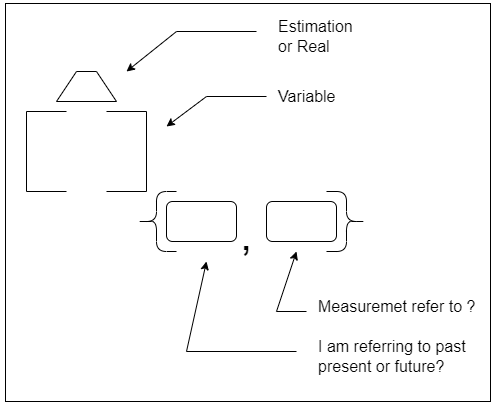

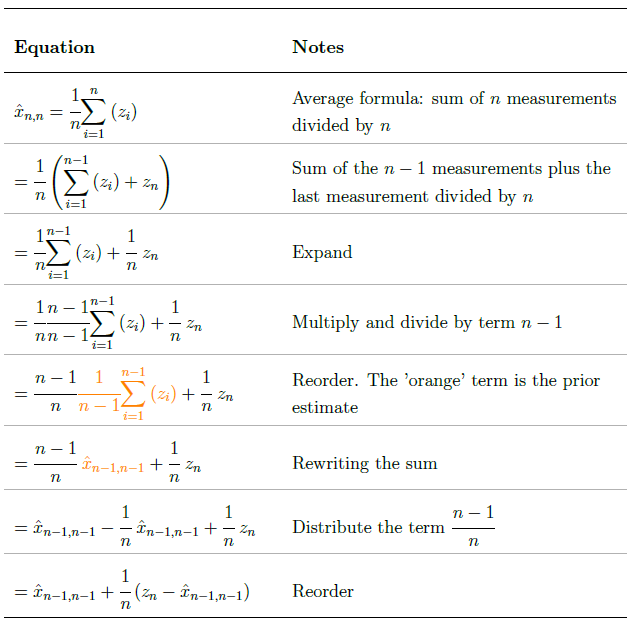

## STATIC SYSTEM (α Filter)

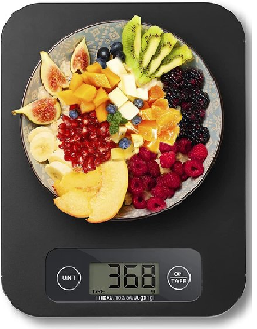

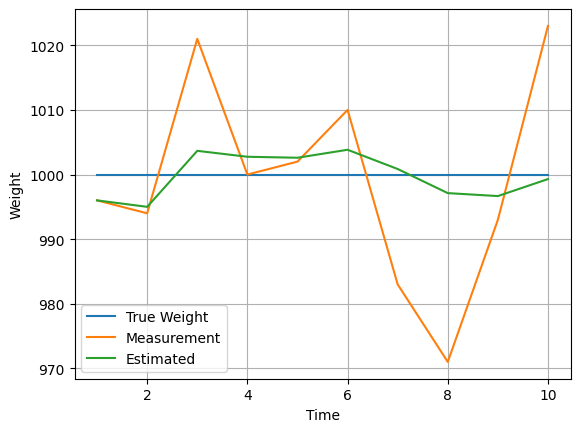

In [ ]:
true_measures = np.multiply(np.ones(10, dtype=int),1000)
weight_measures = np.array([996, 994, 1021, 1000, 1002, 1010, 983, 971, 993, 1023])
x_range = np.arange(1, 11, 1, dtype=int)
temp_list = []

x_h_n_pre_n = 1000

for index in range(len(weight_measures)):
    z_n = weight_measures[index]
    kalman_gain = 1/(index+1)
    # print("weigh {first} and kalman gain {second}".format(first=z_n, second=kalman_gain))
    # State update equation
    x_h_n_n = x_h_n_pre_n + np.multiply(kalman_gain, (z_n - x_h_n_pre_n))
    x_h_n_pre_n = x_h_n_n
    temp_list.append(x_h_n_n)

x_h_n_n_plot = np.asarray(temp_list)

plt.xlabel ("Time")
plt.ylabel ("Weight")
plt.plot(x_range, true_measures, label = "True Weight")
plt.plot(x_range, weight_measures, label = "Measurement")
plt.plot(x_range, x_h_n_n_plot, label = "Estimated")
plt.legend()
plt.grid()
plt.show()

### State Update Equation

$$
\hat{x}_{n, n}=\hat{x}_{n-1, n-1}+\alpha_n\left(z_n-\hat{x}_{n-1, n-1}\right)
$$


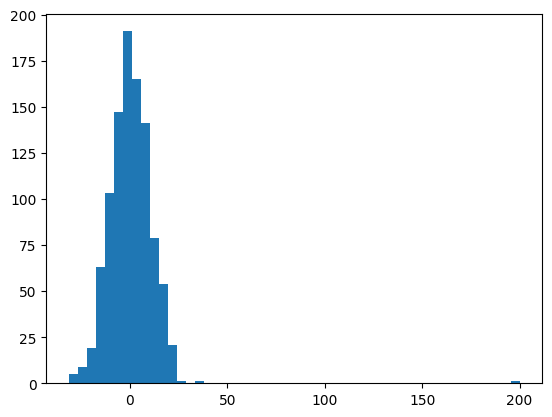

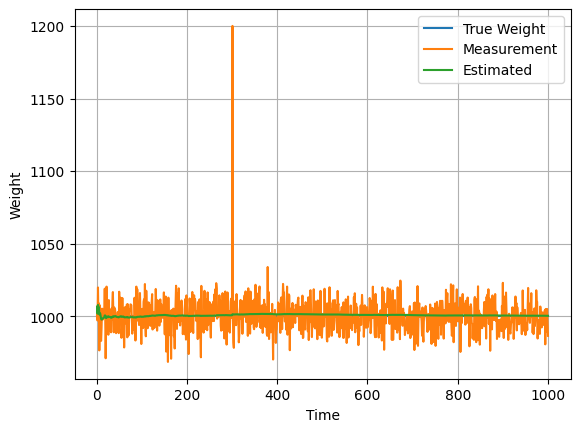

In [ ]:
normal_distrib_nums = np.random.normal(0,10, 1000)
normal_distrib_nums[300:301] = 200
plt.hist(normal_distrib_nums, 50)
plt.show()

true_measures = np.multiply(np.ones(1000, dtype=int),1000)
weight_measures = np.add(normal_distrib_nums,1000)
x_range = np.arange(1, 1001, 1, dtype=int)
temp_list = []

x_h_n_pre_n = 1000

for index in range(len(weight_measures)):
    z_n = weight_measures[index]
    kalman_gain = 1/(index+1)
    # print("weigh {first} and kalman gain {second}".format(first=z_n, second=kalman_gain))
    # State update equation
    x_h_n_n = x_h_n_pre_n + np.multiply(kalman_gain, (z_n - x_h_n_pre_n))
    x_h_n_pre_n = x_h_n_n
    temp_list.append(x_h_n_n)

x_h_n_n_plot = np.asarray(temp_list)

plt.xlabel ("Time")
plt.ylabel ("Weight")
plt.plot(x_range, true_measures, label = "True Weight")
plt.plot(x_range, weight_measures, label = "Measurement")
plt.plot(x_range, x_h_n_n_plot, label = "Estimated")
plt.legend()
plt.grid()
plt.show()

## SYSTEM WITH VELOCITY (α - β Filter)

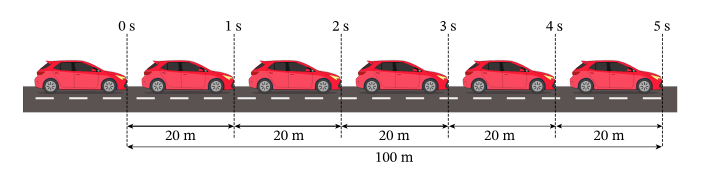

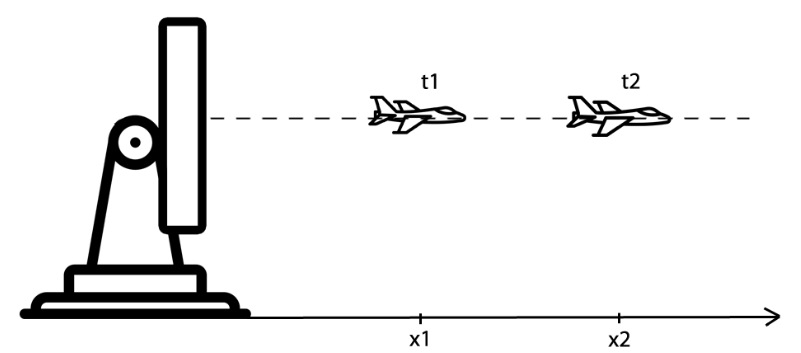

### State Exploration Equation

$
x_n \text { represents the range to the aircraft at time } \boldsymbol{n} \text {. }
$

$
\dot{x}=v=\frac{d x}{d t}
$


$
\begin{gathered}
x_{n+1}=x_n+\Delta t \dot{x}_n \\
\dot{x}_{n+1}=\dot{x}_n
\end{gathered}
$


**Note: **
we have already learned two of the five Kalman Filter equations:
* State Update Equation
* State Extrapolation Equation

### Precision of Measurement
* Lets assume that,
   - Δt is 5s
   - at (n-1)s; estimated range is 30,000m and velocity is 40m/s

Target position at time 'n'

$$
\hat{x}_{n, n-1}=\hat{x}_{n-1, n-1}+\Delta t \hat{\dot{x}}_{n-1, n-1}
$$


```
=30000+5×40=30200m
```

Target Velocity prediction for time 'n'

$$
\hat{\dot{x}}_{n, n-1} = \hat{\dot{x}}_{n-1, n-1}
$$

```
So, it would be still 40m/s
```

But, what if we measure (Zn)= 30,110 ??!!!

Aircraft velocity turns to be 22m/s.

Who is the curlprit?!!

Lets introduce: α β

$$
\hat{x}_{n, n}=\hat{x}_{n, n-1}+ \alpha \left({z}_{n} - \hat{x}_{n, n-1} \right)
$$

$$
\hat{\dot{x}}_{n, n}=\hat{\dot{x}}_{n, n-1}+ \beta \left(\frac{{z}_{n} - \hat{x}_{n, n-1}}{\Delta t} \right)
$$








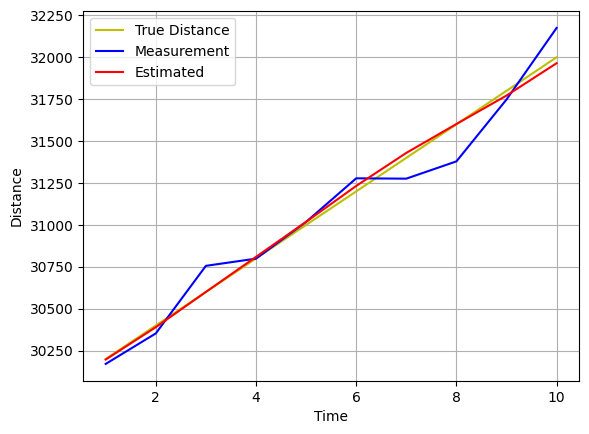

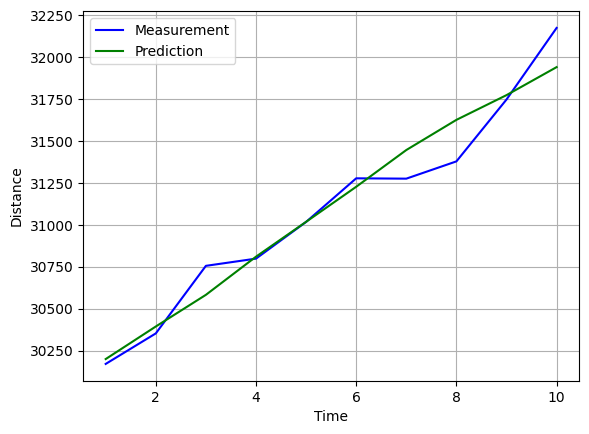

In [ ]:
alpha = 0.1
beta = 0.1
delta_t = 5

temp_array_0 = []
temp_array_1 = []
temp_array_2 = []
temp_array_3 = []

# Inital estimates
x_h_n_pre_n = 30200
x_d_h_n_pre_n = 40

# Measurements
radar_meas = np.array([30171, 30353, 30756, 30799, 31018, 31278, 31276, 31379, 31748, 32175])

x_range = np.arange(1, (len(radar_meas)+1), 1, dtype=int)

# ***********************************************************
# Inital estimates for true range generation
current_range = x_h_n_pre_n
current_vel = x_d_h_n_pre_n

# Lets generate true ranges (Ground truth)
for index in range(len(radar_meas)):
    temp_array_0.append(current_range)
    temp_true_range = current_range + np.multiply(x_d_h_n_pre_n, delta_t)
    current_range = temp_true_range

true_measures = np.asarray(temp_array_0)
# ***************************************************************

for index in range(len(radar_meas)):
    z_n = radar_meas[index]

    # State update equation
    x_h_n_n = x_h_n_pre_n   + np.multiply(alpha, (z_n - x_h_n_pre_n))
    x_d_h_n_n = x_d_h_n_pre_n + np.multiply(beta, np.divide((z_n - x_h_n_pre_n), delta_t))

    # Just for plots
    temp_array_1.append(x_h_n_n)
    temp_array_2.append(x_d_h_n_n)
    temp_array_3.append(x_h_n_pre_n)

    # Extra-polation/ Prediction
    x_h_n_pre_n = x_h_n_n + np.multiply(delta_t, x_d_h_n_n)
    x_d_h_n_pre_n = x_d_h_n_n

    #print ("At iteration {first} Position is {second:.2f} and Velocity is {third:.2f}".format(first=index, second=x_h_n_n, third=x_d_h_n_n))

x_h_n_n_plot = np.asarray(temp_array_1)
x_d_h_n_n_plot = np.asarray(temp_array_2)
predictions_plot = np.asarray(temp_array_3)

plt.xlabel ("Time")
plt.ylabel ("Distance")
plt.plot(x_range, true_measures, 'y', label = "True Distance")
plt.plot(x_range, radar_meas,'b', label = "Measurement")
plt.plot(x_range, x_h_n_n_plot,'r', label = "Estimated")
plt.legend()
plt.grid()
plt.show()

plt.xlabel ("Time")
plt.ylabel ("Distance")
#plt.plot(x_range, true_measures, 'y', label = "True Distance")
plt.plot(x_range, radar_meas,'b', label = "Measurement")
plt.plot(x_range, predictions_plot, 'g', label = "Prediction")
#plt.plot(x_range, x_h_n_n_plot, 'r', label = "Estimated")
plt.legend()
plt.grid()
plt.show()

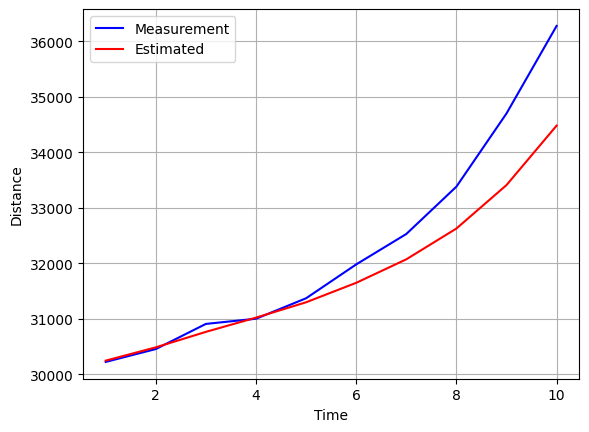

In [ ]:
alpha = 0.2
beta = 0.1
delta_t = 5

temp_array_0 = []
temp_array_1 = []
temp_array_2 = []
temp_array_3 = []

# Inital estimates
x_h_n_pre_n = 30250
x_d_h_n_pre_n = 50

# Measurements
radar_meas = np.array([30221, 30453, 30906, 30999, 31368, 31978, 32526, 33379, 34698, 36275])

x_range = np.arange(1, (len(radar_meas)+1), 1, dtype=int)

for index in range(len(radar_meas)):
    z_n = radar_meas[index]

    # State update equation
    x_h_n_n = x_h_n_pre_n   + np.multiply(alpha, (z_n - x_h_n_pre_n))
    x_d_h_n_n = x_d_h_n_pre_n + np.multiply(beta, np.divide((z_n - x_h_n_pre_n), delta_t))

    # Just for plots
    temp_array_1.append(x_h_n_n)
    temp_array_2.append(x_d_h_n_n)
    temp_array_3.append(x_h_n_pre_n)

    # Extra-polation/ Prediction
    x_h_n_pre_n = x_h_n_n + np.multiply(delta_t, x_d_h_n_n)
    x_d_h_n_pre_n = x_d_h_n_n

    #print ("At iteration {first} Position is {second:.2f} and Velocity is {third:.2f}".format(first=index, second=x_h_n_n, third=x_d_h_n_n))

x_h_n_n_plot = np.asarray(temp_array_1)
x_d_h_n_n_plot = np.asarray(temp_array_2)
predictions_plot = np.asarray(temp_array_3)

plt.xlabel ("Time")
plt.ylabel ("Distance")
plt.plot(x_range, radar_meas,'b', label = "Measurement")
plt.plot(x_range, x_h_n_n_plot,'r', label = "Estimated")
plt.legend()
plt.grid()
plt.show()


## SYSTEM WITH ACCELERATION (α - β - γ Filter)

### State Extrapolation Equation

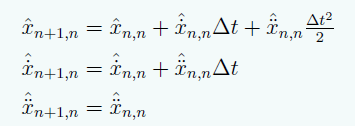

### State Update Equation

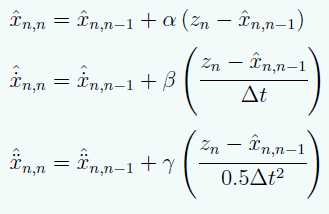

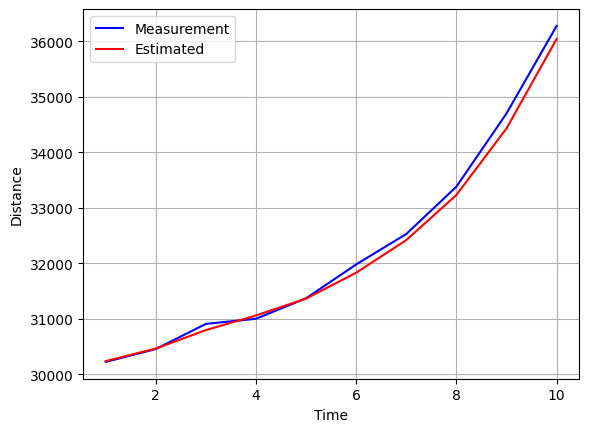

In [ ]:
alpha   = 0.5
beta    = 0.4
gamma   = 0.1
delta_t = 5

# Constant acceleration for 20s (4 samples) and then accelerates at 8m/s^2 for next 35s
# Inital estimates
x_h_n_pre_n = 30250
x_d_h_n_pre_n = 50
x_d_d_h_n_pre_n = 0

temp_array_1 = []
temp_array_2 = []
temp_array_3 = []

# Measurements
radar_meas = np.array([30221, 30453, 30906, 30999, 31368, 31978, 32526, 33379, 34698, 36275])

x_range = np.arange(1, (len(radar_meas)+1), 1, dtype=int)

for index in range(len(radar_meas)):
    z_n = radar_meas[index]

    # State Update Equation
    x_h_n_n = x_h_n_pre_n   + np.multiply(alpha, (z_n - x_h_n_pre_n))
    x_d_h_n_n = x_d_h_n_pre_n + np.multiply(beta, np.divide((z_n - x_h_n_pre_n), delta_t))
    x_d_d_h_n_n = x_d_d_h_n_pre_n + np.multiply(gamma, np.divide((z_n-x_h_n_pre_n), (0.5*delta_t*delta_t)))

    # State Extrapolation/Prediction
    x_h_n_pre_n = x_h_n_n + np.multiply(x_d_h_n_n, delta_t) + np.multiply(np.multiply(0.5, x_d_d_h_n_n), (delta_t*delta_t))
    x_d_h_n_pre_n = x_d_h_n_n + np.multiply(x_d_d_h_n_n, delta_t)
    x_d_d_h_n_pre_n = x_d_d_h_n_n

    temp_array_1.append(x_h_n_n)
    temp_array_2.append(x_d_h_n_n)
    temp_array_3.append(x_d_d_h_n_n)

    '''
    print ("At iteration {first} Position {second:.2f} Velocity {third:.2f} Acceleration {forth:.2f}".\
           format(first=index, second=x_h_n_n, third=x_d_h_n_n, forth=x_d_d_h_n_n))
    print ("At iteration {first} Position {second:.2f} Velocity {third:.2f} Acceleration {forth:.2f}".\
           format(first=index, second=x_h_n_pre_n, third=x_d_h_n_pre_n, forth=x_d_d_h_n_pre_n))
    print ("\n\n")
    '''
x_h_n_n_plot = np.asarray(temp_array_1)
x_d_h_n_n_plot = np.asarray(temp_array_2)
predictions_plot = np.asarray(temp_array_3)

plt.xlabel ("Time")
plt.ylabel ("Distance")
plt.plot(x_range, radar_meas,'b', label = "Measurement")
plt.plot(x_range, x_h_n_n_plot,'r', label = "Estimated")
plt.legend()
plt.grid()
plt.show()

# Object Detection Point of View

# KALMAN FILTER - 1D

Probability Density Function

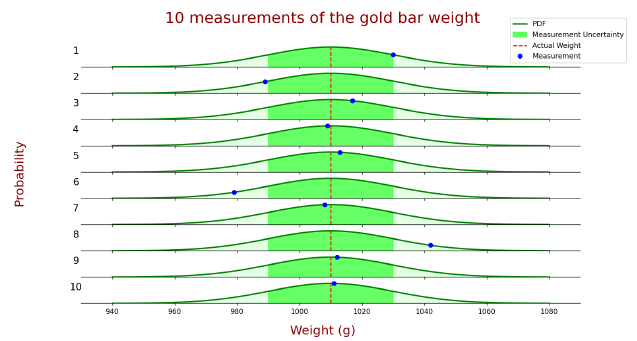

## Some more terminologies

p = State Estimate Variance (State Estimation Uncertainity) <br />
r = Measurement Variance (Measurement Uncertainity)

## 1. State Prediction

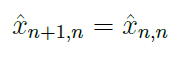
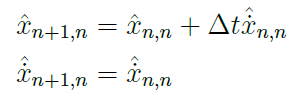

But that is not sufficient <br />
Since Kalman Filter treats the estimate as a random variable, we must also extrapolate
the estimation variance ${p_{n,n}}$ to the next state

For Static System
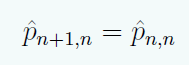

For Dynamic System
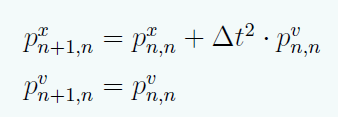

## 2. State Update

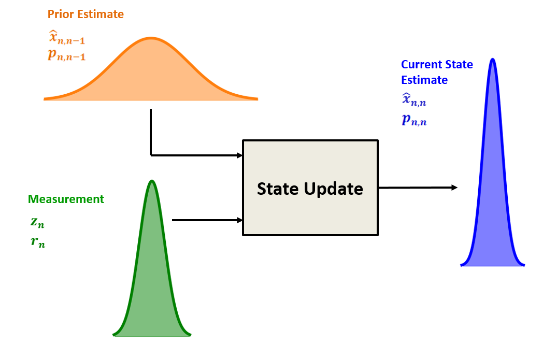

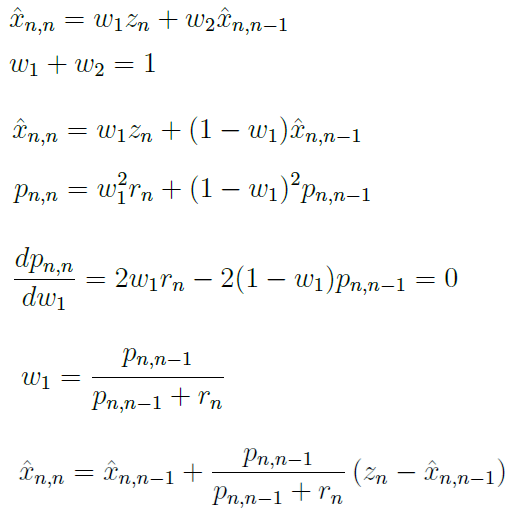

Sumilarly, we can find the ${p}_{n, n}$ <br/>
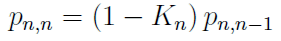

## Static System

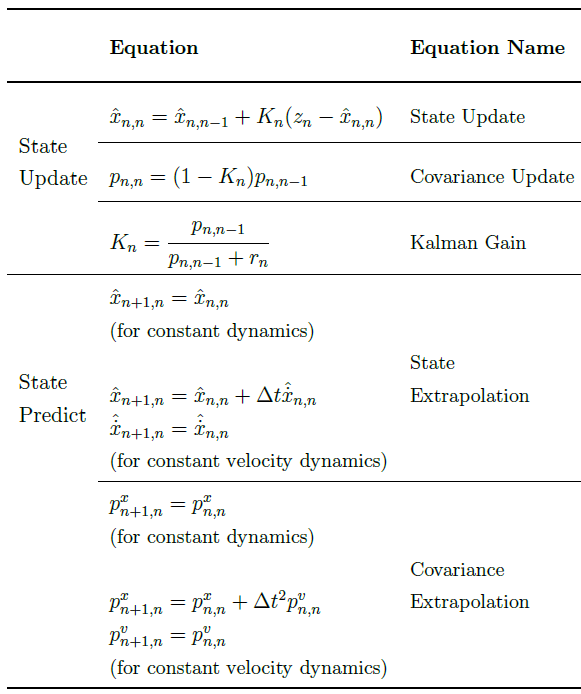

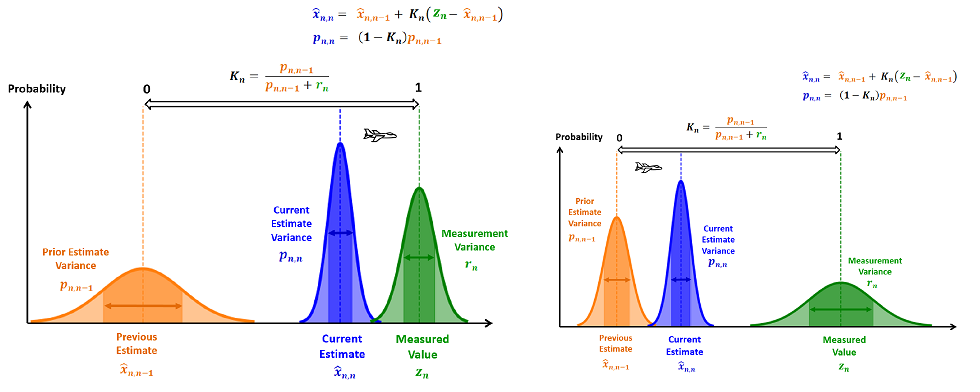

## Kalman Filter Without Process Noise

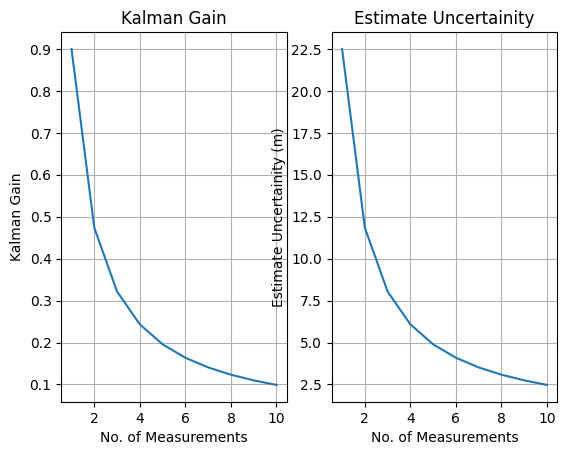

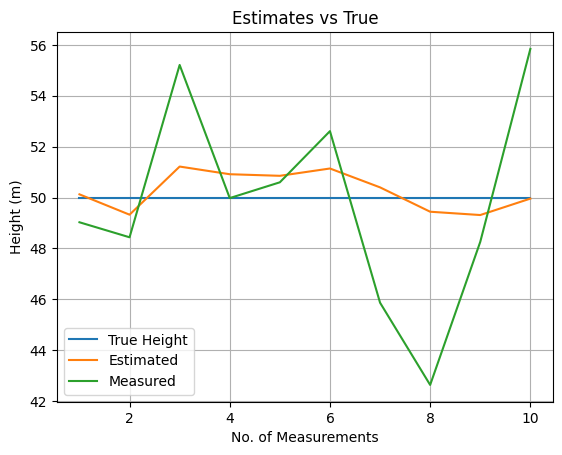

In [ ]:
# True height of the building
true_height = 50

# Altimeter measurement error
r_prev_n = 5

# Height measurement
height_meas = [49.03, 48.44, 55.21, 49.98, 50.6, 52.61, 45.87, 42.64, 48.26, 55.84]

# *************************************************************
x_range = np.arange(1, (len(height_meas)+1), 1, dtype=int)
true_height_plot = np.ones(len(height_meas))*50
kalman_gain_plot = []
estimate_var_plot = []
estimates_plot = []
# *************************************************************

# Inital estimates
x_h_n_pre_n = 60
# Lets assume that, human has 15m error (std), which equals to 225 (variance)
p_n_pre_n = 225

for index in range(len(height_meas)):
# Step 1: Measure
    # Take Measurement
    z_n = height_meas[index]
    # Altimeter uncertainity
    r_n = r_prev_n*r_prev_n

 # Step 2: Update
    # Update kalman gain
    K_n = p_n_pre_n/(p_n_pre_n+r_n)
    # Estimate current state
    x_h_n_n = x_h_n_pre_n + K_n*(z_n - x_h_n_pre_n)
    # Update current estimate varience
    p_n_n = (1-K_n)*p_n_pre_n
    # print ("Kalman gain {0:.2f}, current estimate {1:.2f}, estimate uncertainity {2:.2f} ".format(K_n, x_h_n_n, p_n_n))

# Step 3: Predict
    # Pridicting next iteration building height
    x_h_n_pre_n = x_h_n_n
    p_n_pre_n = p_n_n

# For plots
    kalman_gain_plot.append(K_n)
    estimate_var_plot.append(p_n_n)
    estimates_plot.append(x_h_n_n)

# Plot Kalman Gain and Estimate Uncertainity
plt.subplot (1,2,1)
plt.plot(x_range, kalman_gain_plot)
plt.title("Kalman Gain")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Kalman Gain")
plt.grid()

plt.subplot (1,2,2)
plt.plot(x_range, estimate_var_plot)
plt.title("Estimate Uncertainity")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Estimate Uncertainity (m)")
plt.grid()

plt.show()

# Plot True Height and Estimates
plt.plot(x_range, true_height_plot, label = "True Height")
plt.plot(x_range, estimates_plot, label = "Estimated")
plt.plot(x_range, height_meas, label = "Measured")
plt.title("Estimates vs True")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Height (m)")
plt.legend()
plt.grid()


## Kalman Filter With Process Noise
The uncertainty of the dynamic model is
called the Process Noise. The Process Noise Variance is denoted by the letter $q$

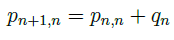

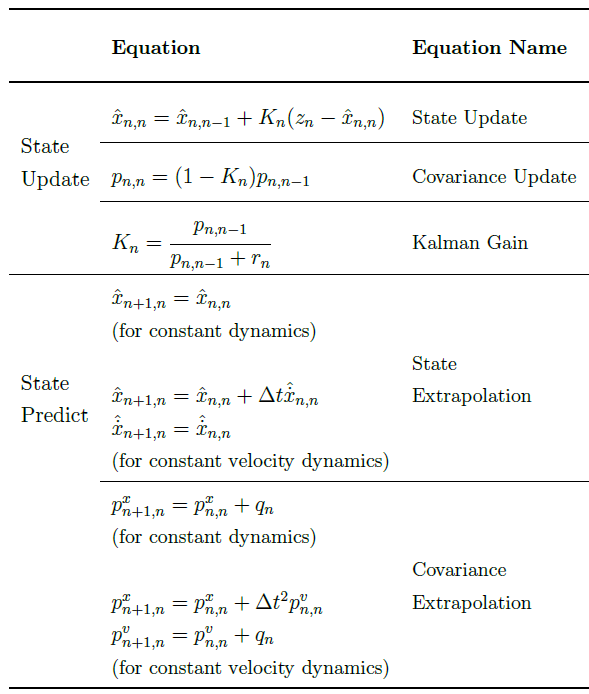

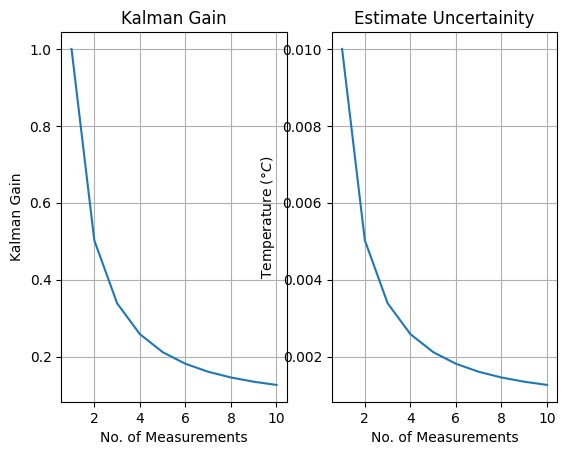

'\nplt.plot(x_range, true_liquid_temp, label = "True Temp")\nplt.plot(x_range, meas_liquid_temp, label = "Measured")\nplt.title ("Estimates vs True")\nplt.xlabel ("No. of Measurements")\nplt.ylabel ("Temperature ($\\degree C$)")\nplt.legend()\nplt.grid()\n'

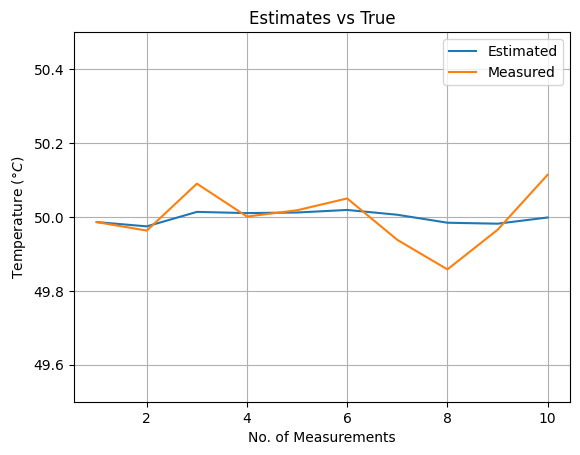

In [30]:
'''
Example: Lets assume that we are measuring the temperature of liquid.
Lets say that, true temperature of the liquid is 50 degree celcius. Process noise (q) is 0.0001 degree celcius.
Lets say that, measurement error (std. deviation) is 0.1 degree celcius.
'''
true_liquid_temp = [50.005, 49.994, 49.993, 50.001, 50.006, 49.998, 50.021, 50.005, 50.000, 49.997]
meas_liquid_temp = [49.986, 49.963, 50.090, 50.001, 50.018, 50.050, 49.938, 49.858, 49.965, 50.114]
delta_t = 5 # Measurement interval

# *************************************************************
x_range = np.arange(1, (len(true_liquid_temp)+1), 1, dtype=int)
kalman_gain_plot = []
estimate_var_plot = []
estimates_plot = []
# *************************************************************

# Inital estimates
x_h_n_pre_n = 60
# Lets assume that, human has 100 degree Celcius 1sigma error
p_n_pre_n = (100*100)+.001
# Process noise
q = 0.0001
# Measurement noise
r = 0.01

for index in range(len(meas_liquid_temp)):
# Step 1: Measure
    # Get temperature value
    z_n = meas_liquid_temp[index]
    # What is the variance we have in sensor?
    r_n = r

# Step 2: Correct/State Update
    # Find Kalman Gain
    K_n = p_n_pre_n/(p_n_pre_n+r_n)

    # Update state equations
    x_n_n = x_h_n_pre_n + K_n*(z_n-x_h_n_pre_n)

    # Update estimate variance
    p_n_n = (1-K_n)*p_n_pre_n

# Step 3: Predict
    # Predict next state. Because we have static system
    x_h_n_pre_n = x_n_n

    # Predict next variance
    p_n_pre_n = p_n_n + q

# For plot
    kalman_gain_plot.append(K_n)
    estimates_plot.append(x_n_n)
    estimate_var_plot.append(p_n_n)
    '''
    print("At index {0:.3f} Kalman Gain {1:.3f}, x_n_n is {2:.3f}, p_n_n is {3:.3f}\
    x_h_n_pre_n is {4:.3f} and p_n_pre_n is {5:.3f}" \
          .format(index, K_n, x_n_n, p_n_n, x_h_n_pre_n, p_n_pre_n))
    '''

# Plot Kalman Gain and Estimate Uncertainity
plt.subplot (1,2,1)
plt.plot(x_range, kalman_gain_plot)
plt.title("Kalman Gain")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Kalman Gain")
plt.grid()

plt.subplot (1,2,2)
plt.plot(x_range, estimate_var_plot)
plt.title("Estimate Uncertainity")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Temperature ($\degree C$)")
plt.grid()

plt.show()

# Plot True Height and Estimates
plt.plot(x_range, estimates_plot, label = "Estimated")
plt.plot(x_range, meas_liquid_temp, label = "Measured")
plt.title("Estimates vs True")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Temperature ($\degree C$)")
plt.ylim([49.5, 50.5])
plt.legend()
plt.grid()

## Dynamic System Modelling Using Heigher Process Noise

At index 0.000 Kalman Gain 1.000, x_n_n is 50.486, p_n_n is 0.010    x_h_n_pre_n is 50.486 and p_n_pre_n is 0.160
At index 1.000 Kalman Gain 0.941, x_n_n is 50.935, p_n_n is 0.009    x_h_n_pre_n is 50.935 and p_n_pre_n is 0.159
At index 2.000 Kalman Gain 0.941, x_n_n is 51.558, p_n_n is 0.009    x_h_n_pre_n is 51.558 and p_n_pre_n is 0.159
At index 3.000 Kalman Gain 0.941, x_n_n is 51.975, p_n_n is 0.009    x_h_n_pre_n is 51.975 and p_n_pre_n is 0.159
At index 4.000 Kalman Gain 0.941, x_n_n is 52.486, p_n_n is 0.009    x_h_n_pre_n is 52.486 and p_n_pre_n is 0.159
At index 5.000 Kalman Gain 0.941, x_n_n is 53.017, p_n_n is 0.009    x_h_n_pre_n is 53.017 and p_n_pre_n is 0.159
At index 6.000 Kalman Gain 0.941, x_n_n is 53.413, p_n_n is 0.009    x_h_n_pre_n is 53.413 and p_n_pre_n is 0.159
At index 7.000 Kalman Gain 0.941, x_n_n is 53.832, p_n_n is 0.009    x_h_n_pre_n is 53.832 and p_n_pre_n is 0.159
At index 8.000 Kalman Gain 0.941, x_n_n is 54.428, p_n_n is 0.009    x_h_n_pre_n is 54.4

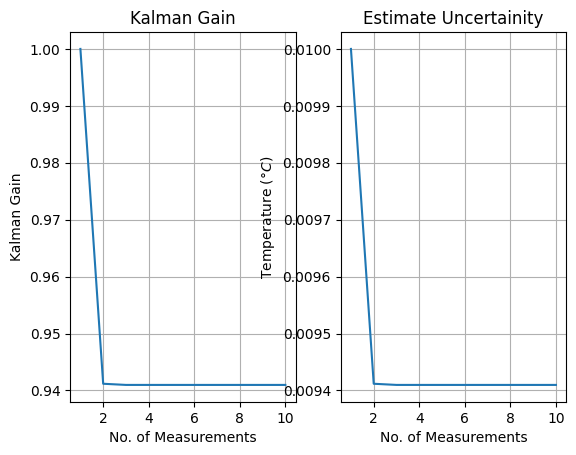

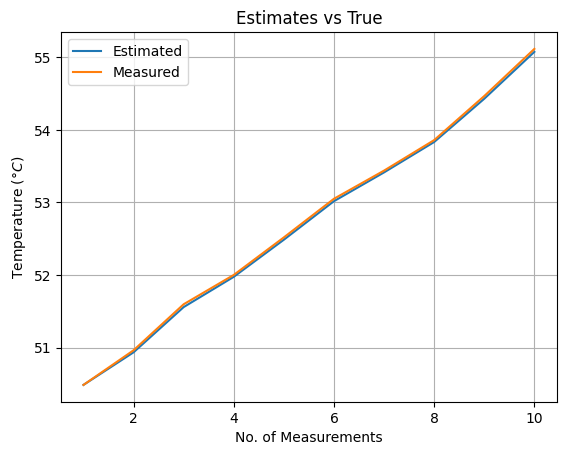

In [38]:
'''
Example: This example is similar to previous example. We are assuming that, liquid is getting heated, but we do not know
the dynamics of heating
process noise (q) = Test with 0.0001 and even heigher values
Lets say that, measurement error (std. deviation) is 0.1 degree celcius.
'''
true_liquid_temp = [50.505, 50.994, 51.493, 52.001, 52.506, 52.998, 53.521, 54.005, 54.500, 54.997]
meas_liquid_temp = [50.486, 50.963, 51.597, 52.001, 52.518, 53.050, 53.438, 53.858, 54.465, 55.114]
delta_t = 5 # Measurement interval

# *************************************************************
x_range = np.arange(1, (len(true_liquid_temp)+1), 1, dtype=int)
kalman_gain_plot = []
estimate_var_plot = []
estimates_plot = []
# *************************************************************

# Inital estimates
x_h_n_pre_n = 10
# Lets assume that, human has 100 degree Celcius 1sigma error
p_n_pre_n = (100*100)+.001
# Process noise
q = 0.15
# Measurement noise
r = 0.01

for index in range(len(meas_liquid_temp)):
# Step 1: Measure
    # Get temperature value
    z_n = meas_liquid_temp[index]
    # What is the variance we have in sensor?
    r_n = r

# Step 2: Correct/State Update
    # Find Kalman Gain
    K_n = p_n_pre_n/(p_n_pre_n+r_n)

    # Update state equations
    x_n_n = x_h_n_pre_n + K_n*(z_n-x_h_n_pre_n)

    # Update estimate variance
    p_n_n = (1-K_n)*p_n_pre_n

# Step 3: Predict
    # Predict next state. Because we have static system
    x_h_n_pre_n = x_n_n

    # Predict next variance
    p_n_pre_n = p_n_n + q

# For plot
    kalman_gain_plot.append(K_n)
    estimates_plot.append(x_n_n)
    estimate_var_plot.append(p_n_n)

    print("At index {0:.3f} Kalman Gain {1:.3f}, x_n_n is {2:.3f}, p_n_n is {3:.3f}\
    x_h_n_pre_n is {4:.3f} and p_n_pre_n is {5:.3f}" \
          .format(index, K_n, x_n_n, p_n_n, x_h_n_pre_n, p_n_pre_n))



# Plot Kalman Gain and Estimate Uncertainity
plt.subplot (1,2,1)
plt.plot(x_range, kalman_gain_plot)
plt.title("Kalman Gain")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Kalman Gain")
plt.grid()

plt.subplot (1,2,2)
plt.plot(x_range, estimate_var_plot)
plt.title("Estimate Uncertainity")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Temperature ($\degree C$)")
plt.grid()

plt.show()

# Plot True Height and Estimates
plt.plot(x_range, estimates_plot, label = "Estimated")
plt.plot(x_range, meas_liquid_temp, label = "Measured")
plt.title("Estimates vs True")
plt.xlabel ("No. of Measurements")
plt.ylabel ("Temperature ($\degree C$)")
plt.legend()
plt.grid()
